In [21]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

7


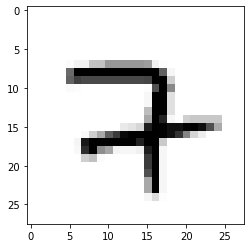

In [22]:
import matplotlib.pyplot as plt 
image_index = 38
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')

In [23]:
x_train.shape

(60000, 28, 28)

In [24]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Flattening the 2D arrays for fully connected layers
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [28]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x = x_train,y =y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 15s 258us/sample - loss: 0.2017 - accuracy: 0.9396
Epoch 2/10
60000/60000 [==============================] - 17s 285us/sample - loss: 0.0820 - accuracy: 0.9750
Epoch 3/10
60000/60000 [==============================] - 18s 305us/sample - loss: 0.0597 - accuracy: 0.9813
Epoch 4/10
60000/60000 [==============================] - 18s 301us/sample - loss: 0.0444 - accuracy: 0.9853
Epoch 5/10
60000/60000 [==============================] - 18s 306us/sample - loss: 0.0348 - accuracy: 0.9886
Epoch 6/10
60000/60000 [==============================] - 19s 314us/sample - loss: 0.0312 - accuracy: 0.9895
Epoch 7/10
60000/60000 [==============================] - 19s 311us/sample - loss: 0.0265 - accuracy: 0.9908
Epoch 8/10
60000/60000 [==============================] - 18s 302us/sample - loss: 0.0210 - accuracy: 0.9930
Epoch 9/10
60000/60000 [==============================] - 18s 306us/sample - loss: 0.0195 - accuracy: 0.9

In [29]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 87us/sample - loss: 0.0632 - accuracy: 0.9847


[0.06320898531292987, 0.9847]

Predicted digit is  1


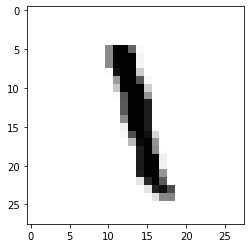

In [30]:
# Prediction of index 700
image_index = 700
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print("Predicted digit is " ,pred.argmax())